# Gene expression

**Import**

In [2]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import diffxpy.api as dxpy
import plotly.express as px

In [3]:
adata_input = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/merged_norm_adata.h5ad'

In [4]:
adata = sc.read(adata_input)

In [5]:
#open human lncRNA txt file
HUM_lncRNAs = []
f = open('/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping/annotation_starsolo/lncRNAs.txt', "r")
for line in f:
    l = line.strip('\n')
    HUM_lncRNAs.append(l)
print(f)
f.close()

<_io.TextIOWrapper name='/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping/annotation_starsolo/lncRNAs.txt' mode='r' encoding='UTF-8'>


In [6]:
adata

AnnData object with n_obs × n_vars = 46782 × 20350
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Undif. SG_score', 'Dif. SG_score', 'Lept. SC_score', 'Zyg. SC_score', 'Pach.Dipl. SC_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'SC_score', 'SC.I_score', 'SC.II_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'leiden_R.4', 'leiden_R.5', 'species', 'spermatogenesis_types_integration'
    var: 'feature_types', 'chromosome', 'gene_ids-Bon', 'n_cells-Bon', 'highly_variable-Bon', 'means-Bon', 'dispersions-Bon', 'dispersions_norm-Bon', 'gene_ids-Chimp', 'n_cells-Chimp', 'highly_variable-Chimp', 'means-Chimp', 'd

In [7]:
category_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage']

In [8]:
palette_dict = {"Undif. SG":'lightblue',"Dif. SG":'blue',"SC.I":'lightgreen','SC.II':'green','Early round SD':'yellow','Late round SD':'orange','Elong. SD':'red','Sertoli':'pink','Macrophage':'brown'}

In [9]:
fig = px.histogram(adata.obs['spermatogenesis_types_integration'], x='spermatogenesis_types_integration', color='spermatogenesis_types_integration',color_discrete_map=palette_dict)
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=category_order
    ),
    autosize=False,
    width=800,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()


In [10]:
# LINC genes, True/False vector
LINC = ['LINC' in i for i in adata.var_names] 

In [11]:
LINC_genes = adata[:,LINC].var_names

In [29]:
LINC_genes

Index(['LINC01409', 'LINC01128', 'LINC01134', 'LINC02780', 'LINC01672',
       'LINC02606', 'LINC01141', 'LINC00339', 'LINC01355', 'LINC01715',
       ...
       'LINC01203', 'LINC01282', 'LINC01284', 'LINC01278', 'LINC00630',
       'LINC01285', 'LINC00632', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=849)

894 LINC genes are expressed across all species

In [13]:
shared_lnc = []
for gene in HUM_lncRNAs:
        if gene in adata.var_names:
            shared_lnc.append(gene)
len(shared_lnc)

5463

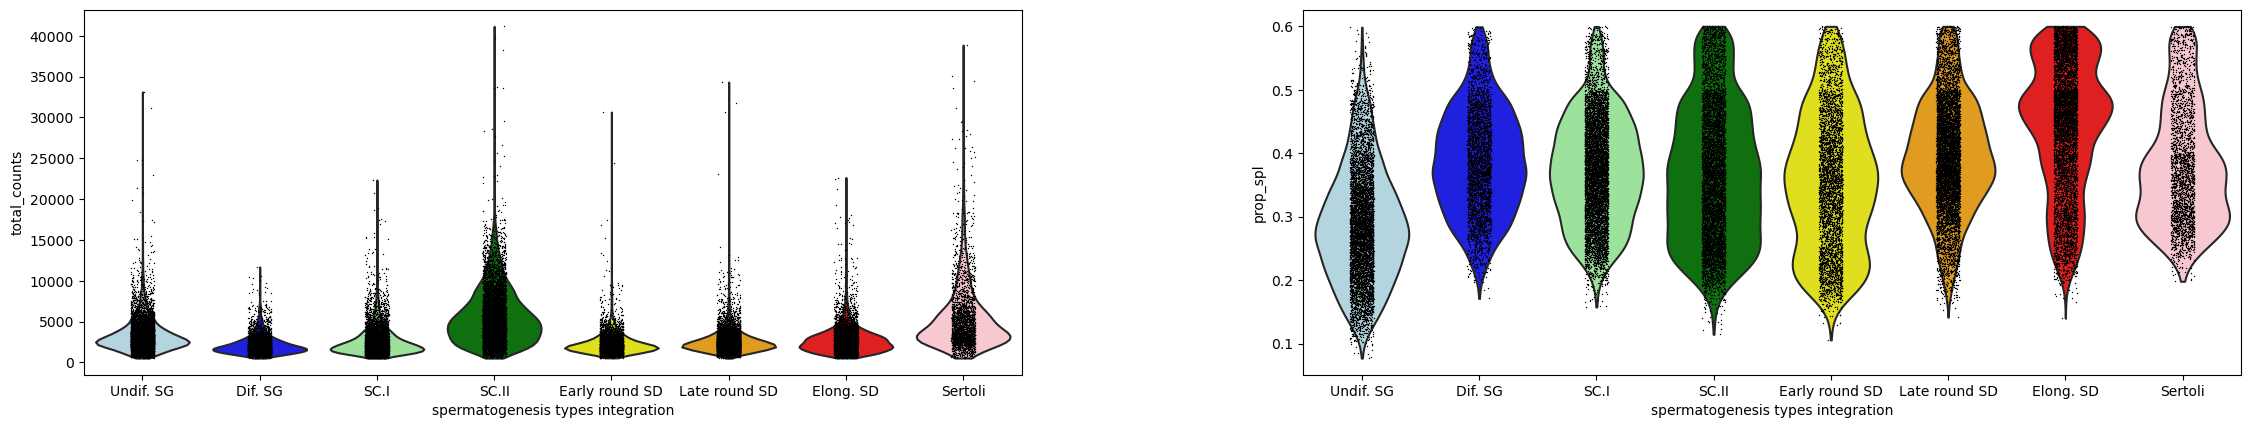

In [14]:
with rc_context({'figure.figsize': (10, 5)}):
    sc.pl.violin(adata, ['total_counts', 'prop_spl'], groupby='spermatogenesis_types_integration', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

In [15]:
adata

AnnData object with n_obs × n_vars = 46782 × 20350
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Undif. SG_score', 'Dif. SG_score', 'Lept. SC_score', 'Zyg. SC_score', 'Pach.Dipl. SC_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'SC_score', 'SC.I_score', 'SC.II_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'leiden_R.4', 'leiden_R.5', 'species', 'spermatogenesis_types_integration'
    var: 'feature_types', 'chromosome', 'gene_ids-Bon', 'n_cells-Bon', 'highly_variable-Bon', 'means-Bon', 'dispersions-Bon', 'dispersions_norm-Bon', 'gene_ids-Chimp', 'n_cells-Chimp', 'highly_variable-Chimp', 'means-Chimp', 'd

In [16]:
adata.uns['DE_leiden_celltype_integration']['names']

array([('AUTS2', 'LRRIQ1', 'FAM229A', 'CNBD1', 'MALAT1', 'TTC28', 'DPY19L2', 'ERBB4', 'PARD3'),
       ('UBE2E2', 'TTC29', 'C20orf144', 'COL25A1', 'TSHZ2', 'HORMAD1', 'STRBP', 'GPC5', 'MTUS2'),
       ('SPIDR', 'MAPK10', 'CCDC168', 'IQCM', 'NEAT1', 'SYCP1', 'ANKRD30A', 'CARMIL1', 'NALF1'),
       ('amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/12F/12G/12H/12J', 'PACRG', 'HMGB4', 'TSBP1', 'RBMS3', 'AGBL4', 'ANKRD62', 'ZBTB20', 'NRG3'),
       ('JMJD1C', 'CNBD1', 'PPP2R2B', 'LRBA', 'DCN', 'SMC1B', 'C1QTNF3', 'SYNE2', 'CALN1'),
       ('HELLS', 'SPAG16', 'TMEM191B', 'STXBP5-AS1', 'IGFBP7', 'SCMH1', 'ANKRD20A1', 'ARL15', 'NLGN1'),
       ('STAG1', 'KCNT2', 'SIRT2', 'SLC44A5', 'MIR99AHG', 'LOC105373554', 'ANKRD30B', 'SYNE1', 'BMPR1B'),
       ('PTMA', 'LOC105372004', 'FAM186A', 'PSD3', 'EBF1', 'LINC01572', 'ANKRD36C', 'BBX', 'AFF3'),
       ('SMC1B', 'CADM1', 'LOC730098', 'PLCZ1', 'LAMA2', 'SYCP2', 'CCDC144A', 'CADM1', 'FOXP1'),
       ('RPS2', 'CCDC146', 'NUPR2', 'GOLGA6L2', 'ZBTB20', 'ATRN

In [17]:
top50 = pd.DataFrame(adata.uns['DE_leiden_celltype_integration']['names']) # top 5 ranked genes for each cluster

top50.head()

Dif. SG Early round SD  \
0                                              AUTS2         LRRIQ1   
1                                             UBE2E2          TTC29   
2                                              SPIDR         MAPK10   
3  amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/1...          PACRG   
4                                             JMJD1C          CNBD1   

   Elong. SD Late round SD Macrophage     SC.I     SC.II  Sertoli Undif. SG  
0    FAM229A         CNBD1     MALAT1    TTC28   DPY19L2    ERBB4     PARD3  
1  C20orf144       COL25A1      TSHZ2  HORMAD1     STRBP     GPC5     MTUS2  
2    CCDC168          IQCM      NEAT1    SYCP1  ANKRD30A  CARMIL1     NALF1  
3      HMGB4         TSBP1      RBMS3    AGBL4   ANKRD62   ZBTB20      NRG3  
4    PPP2R2B          LRBA        DCN    SMC1B   C1QTNF3    SYNE2     CALN1

In [18]:
top50

Dif. SG Early round SD  \
0                                               AUTS2         LRRIQ1   
1                                              UBE2E2          TTC29   
2                                               SPIDR         MAPK10   
3   amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/1...          PACRG   
4                                              JMJD1C          CNBD1   
5                                               HELLS         SPAG16   
6                                               STAG1          KCNT2   
7                                                PTMA   LOC105372004   
8                                               SMC1B          CADM1   
9                                                RPS2        CCDC146   
10                                           IL1RAPL1   LOC101929492   
11                                              TAF15        CFAP299   
12                                               ERC1           ULK4   
13                                               RERE          MROH9   
14                                            B3GALT1      LINC01500   
15                                             CAMTA1   LOC105377110   
16                   amplicon-chrX-SSX1/2/2B/344B/5/7           ZBBX   
17                                              EPB41          WDR41   
18                                              PRAME          AGBL4   
19                                            CCDC137        TMEM232   
20                                             ZCCHC7         SEL1L2   
21                                             ATP2B1        CCDC148   
22                                               TTC3        EFCAB11   
23                                       LOC105377171          MAST4   
24                                             MAP4K4        METTL15   
25                                              DMRT1           ADGB   
26                                              HMGB1        CFAP157   
27                                               GPHN          CASC2   
28                                               NASP        ARHGEF3   
29                                              ASAP1         CFAP54   
30                                       LOC100507336          KCNU1   
31                                              NR6A1          NLRP1   
32                                              HERC5        CCDC178   
33                                             RPL10A          COX6C   
34                                              SMYD3         CEP112   
35                     amplicon-chrY-TSPY1/10/2/3/4/8          NEK11   
36                                             POU2F1       GOLGA6L2   
37                                              PDE8A         SPINK2   
38                                              TEX11          LEKR1   
39                                              DPEP3         RBAKDN   
40                                       LOC107985508          ODAD2   
41                                             RNF130       C10orf67   
42                                                EVL           WWOX   
43                                               PTK2        DYNC2H1   
44                                             ZFYVE9          TPTE2   
45                                               AHI1         NKX6-1   
46                                               GLG1         SPAG17   
47                                          LINC02645        CCDC192   
48                                               ASPM           NOL4   
49                                             SPECC1        NPIPB15   

       Elong. SD Late round SD Macrophage          SC.I  \
0        FAM229A         CNBD1     MALAT1         TTC28   
1      C20orf144       COL25A1      TSHZ2       HORMAD1   
2        CCDC168          IQCM      NEAT1         SYCP1   
3          HMGB4         TSBP1      RBMS3         AGBL4   
4        PPP2R2B          LRBA        DCN         SMC1B   
5       TMEM191B   

In [19]:
# all lncRNA genes in the top 50 genes
top50_lnc = {'Undif. SG':[],'Dif. SG':[],'SC.I':[],'SC.II':[],'Early round SD':[],'Late round SD':[],'Elong. SD':[],'Sertoli':[],'Macrophage':[]}

for celltype, genes in top50.items():
    for gene in genes:
        if gene in HUM_lncRNAs:
            top50_lnc[celltype].append(gene)

In [20]:
top50_lnc

{'Undif. SG': ['LOC105376755', 'LOC442028', 'LOC107986770', 'MEF2C-AS1'],
 'Dif. SG': ['LOC105377171', 'LOC100507336', 'LOC107985508', 'LINC02645'],
 'SC.I': ['LOC105373554',
  'LINC01572',
  'MGC4859',
  'MALAT1',
  'MIR4713HG',
  'LOC100506207',
  'LOC105373592',
  'KCNQ1OT1'],
 'SC.II': ['LINC01206',
  'AP4B1-AS1',
  'ANKRD20A4-ANKRD20A20P',
  'LOC440910',
  'LINC00342',
  'LOC105376107',
  'LOC100506207',
  'ADD3-AS1',
  'LOC105379207',
  'NOVA1-DT'],
 'Early round SD': ['LOC105372004',
  'LOC101929492',
  'LINC01500',
  'LOC105377110',
  'CASC2',
  'RBAKDN'],
 'Late round SD': ['STXBP5-AS1',
  'LINC01500',
  'LINC00917',
  'LOC101929563',
  'LINC02842',
  'PCDH9-AS3',
  'LOC101929492',
  'LOC105372733',
  'LOC112268205',
  'LOC105375387',
  'LINC01492',
  'LOC105369838',
  'LINC01192',
  'LRRC7-AS1',
  'LINC00869'],
 'Elong. SD': ['LOC102723490',
  'LOC101928012',
  'SPATA42',
  'LINC00265',
  'LINC01837',
  'LOC105375477',
  'LOC100996249',
  'MAP3K14-AS1',
  'STXBP5-AS1',
  'LIN

In [21]:
lnc_count = {}

for celltype, genes in top50_lnc.items():
    lnc_count[celltype]=len(genes)

In [22]:
lnc_count

{'Undif. SG': 4,
 'Dif. SG': 4,
 'SC.I': 8,
 'SC.II': 10,
 'Early round SD': 6,
 'Late round SD': 15,
 'Elong. SD': 10,
 'Sertoli': 6,
 'Macrophage': 7}

In [23]:
# to compare to a certain gene across groups
# no. 3 in SC.I
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LOC105373554'], groupby='spermatogenesis_types_integration', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

In [31]:
to_plot = []
to_plot = [top50_lnc[celltype][0] for celltype in top50_lnc]

In [36]:
to_plot

['LOC105376755',
 'LOC105377171',
 'LOC105373554',
 'LINC01206',
 'LOC105372004',
 'STXBP5-AS1',
 'LOC102723490',
 'NEAT1',
 'NEAT1']

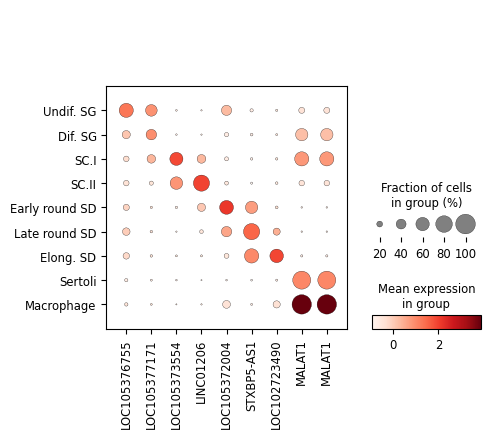

In [33]:
sc.pl.dotplot(adata, to_plot, groupby='spermatogenesis_types_integration', categories_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage'])

In [35]:
sc.pl.dotplot(adata, to_plot, groupby='spermatogenesis_types_integration', categories_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage'])

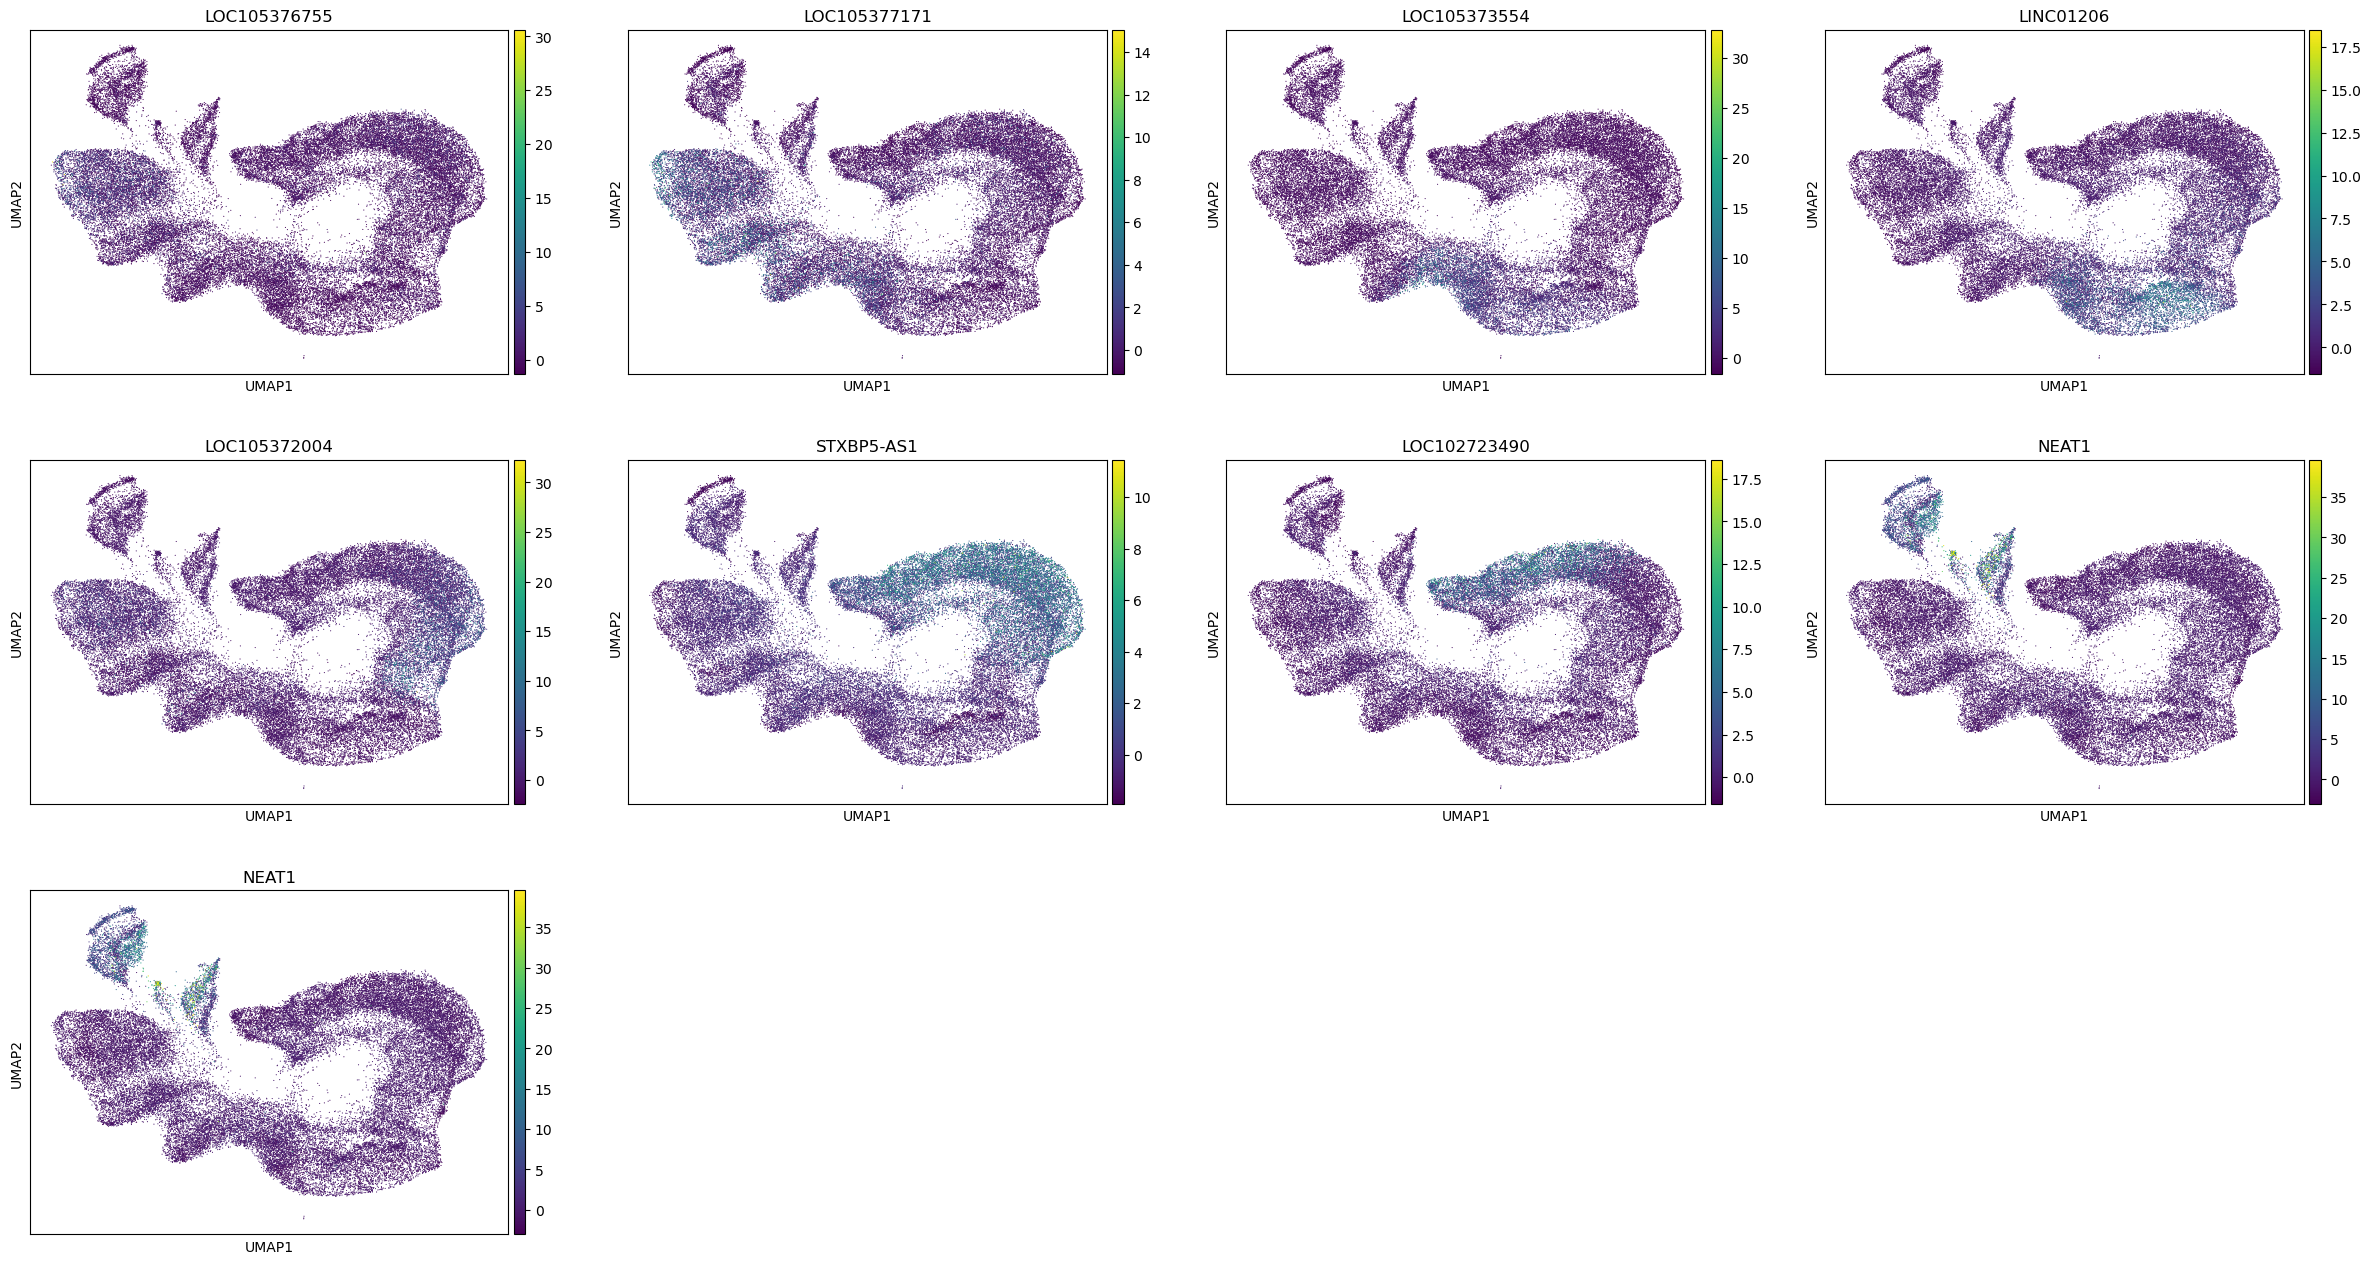

In [30]:
# UMAP colored by the top genes
sc.plotting.umap(adata, color=to_plot)


In [ ]:
adata

In [ ]:
fig = px.histogram(adata.obs['spermatogenesis_types_integration'], x='spermatogenesis_types_integration', color='spermatogenesis_types_integration',color_discrete_map=palette_dict)
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=category_order
    ),
    autosize=False,
    width=800,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()